In [2]:
# Importing necessary libraries
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bundesliga Match Outcome Prediction: Exploratory Data Analysis
## 1. Introduction
This notebook provides a detailed exploratory data analysis (EDA) of Bundesliga matches. The goal is to uncover insights that will support the development of a predictive model for match outcomes (win, lose, or draw). The dataset includes performance indicators such as goals scored, expected goals (xG), possession, and opponent-related metrics.

## 2. Data Loading and Inspection
We'll start by loading the dataset and conducting a basic inspection, including checking for missing values.

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('bundesliga_matches_exploratory.csv')

# Show the first few rows of the dataframe
df.head()

# Inspect the dataset structure
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1260 non-null   int64  
 1   date                              1260 non-null   object 
 2   time                              1260 non-null   object 
 3   comp                              1260 non-null   object 
 4   round                             1260 non-null   object 
 5   day                               1260 non-null   object 
 6   venue                             1260 non-null   object 
 7   result                            1260 non-null   object 
 8   gf                                1260 non-null   int64  
 9   ga                                1260 non-null   int64  
 10  xg                                1259 non-null   float64
 11  xga                               1259 non-null   float64
 12  poss  

Unnamed: 0                      0
date                            0
time                            0
comp                            0
round                           0
                               ..
opponent_fk_last_4_games       45
opponent_pk_last_4_games       45
opponent_pkatt_last_4_games    45
opponent_xg_last_4_games       45
opponent_poss_last_4_games     45
Length: 75, dtype: int64

## 3. Summary Statistics
We will compute and visualize summary statistics to get a higher understanding of the numerical features.

In [4]:
# Summary statistics of the dataset
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,opponent_gf,opponent_ga,opponent_xg,opponent_xga,...,xg_last_4_games,poss_last_4_games,opponent_sh_last_4_games,opponent_sot_last_4_games,opponent_dist_last_4_games,opponent_fk_last_4_games,opponent_pk_last_4_games,opponent_pkatt_last_4_games,opponent_xg_last_4_games,opponent_poss_last_4_games
count,1260.000000,1260.000000,1260.000000,1259.000000,1259.000000,1260.000000,1260.000000,1260.000000,1259.000000,1259.000000,...,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,1259.276984,1.773810,1.372222,1.619301,1.316759,51.322222,1.372222,1.773810,1.316759,1.619301,...,1.438347,49.831550,12.957407,4.457682,17.487599,0.405213,0.129767,0.165432,1.476214,50.161660
std,727.994909,1.426108,1.238266,0.891490,0.783432,10.959931,1.238266,1.426108,0.783432,0.891490,...,0.544185,7.706188,3.325992,1.584813,1.623187,0.353780,0.192377,0.211254,0.549891,7.819798
min,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,25.000000,5.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.275000,28.000000
25%,629.500000,1.000000,0.000000,1.000000,0.700000,43.000000,0.000000,1.000000,0.700000,1.000000,...,1.050000,44.250000,10.750000,3.250000,16.400000,0.250000,0.000000,0.000000,1.075000,44.750000
50%,1260.000000,2.000000,1.000000,1.500000,1.200000,52.000000,1.000000,2.000000,1.200000,1.500000,...,1.375000,49.250000,12.500000,4.250000,17.425000,0.250000,0.000000,0.000000,1.400000,49.500000
75%,1889.250000,3.000000,2.000000,2.100000,1.700000,59.000000,2.000000,3.000000,1.700000,2.100000,...,1.750000,55.000000,14.750000,5.250000,18.475000,0.500000,0.250000,0.250000,1.775000,55.500000
max,2518.000000,8.000000,7.000000,6.200000,5.500000,80.000000,7.000000,8.000000,5.500000,6.200000,...,4.000000,72.000000,33.000000,15.000000,25.100000,3.000000,1.000000,1.000000,4.100000,75.000000


## 4. Analysis of Match Outcomes 


### 4.1 Analyzing the distribution of the target variable `result` (win, lose, draw) for home games to see if "home" advantage is real

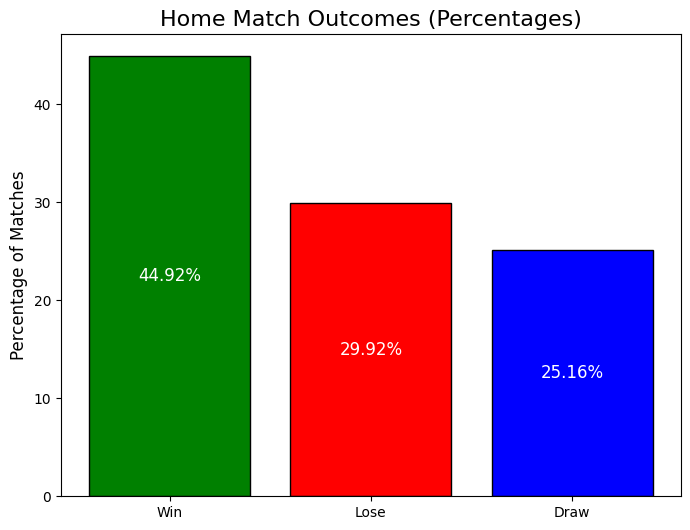

In [5]:

# Count wins, losses, and draws where teams play at home
home_wins = df[(df['venue'] == 'Home') & (df['result'] == 'W')].shape[0]
home_losses = df[(df['venue'] == 'Home') & (df['result'] == 'L')].shape[0]
home_draws = df[(df['venue'] == 'Home') & (df['result'] == 'D')].shape[0]

# Calculating the total number of home matches
total_home_matches = home_wins + home_losses + home_draws

# Calculating the percentage of each outcome
home_win_percentage = (home_wins / total_home_matches) * 100
home_loss_percentage = (home_losses / total_home_matches) * 100
home_draw_percentage = (home_draws / total_home_matches) * 100

# Creating a bar plot with percentages shown inside the bars and without grid lines
plt.figure(figsize=(8, 6))
outcomes = ['Win', 'Lose', 'Draw']
percentages = [home_win_percentage, home_loss_percentage, home_draw_percentage]
colors = ['green', 'red', 'blue']

bars = plt.bar(outcomes, percentages, color=colors, edgecolor='black')

# Adding the percentage values inside the bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.2f}%', ha='center', va='center', fontsize=12, color='white')

# Adding titles and labels
plt.title('Home Match Outcomes (Percentages)', fontsize=16)
plt.ylabel('Percentage of Matches', fontsize=12)

# Removing grid lines
plt.grid(False)

# Display the plot
plt.show()


### 4.2 Analyzing the distribution of the result capturing Overall Fifa Rating

C:\Users\czarn\AppData\Local\Temp\ipykernel_11652\1538923861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='team_overall', data=df, palette={'W': 'green', 'L': 'red', 'D': 'blue'})


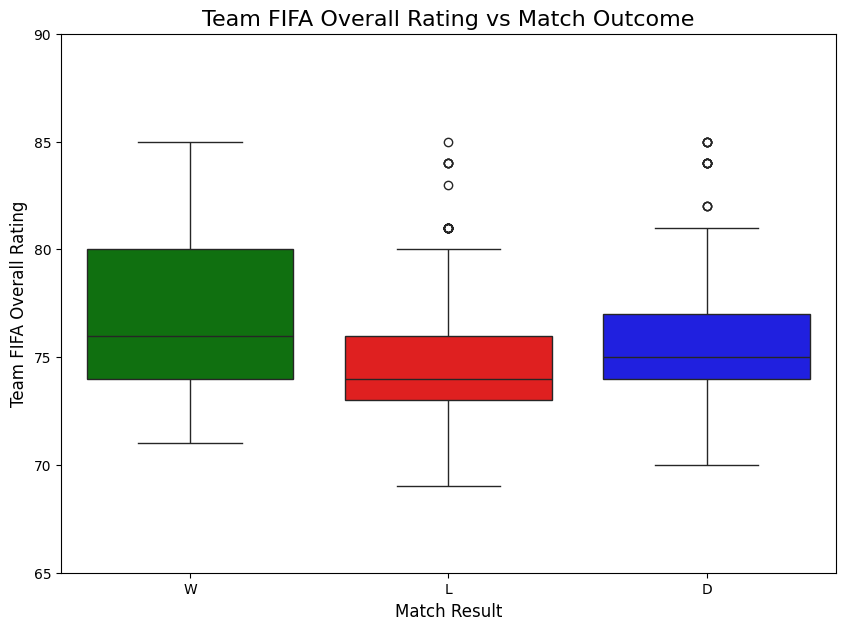

In [6]:
# Adjusting the plot size to a moderate scale for better visualization

plt.figure(figsize=(10, 7))  # Slightly smaller figure size for balance

# Creating the boxplot for 'team_overall' grouped by 'result'
sns.boxplot(x='result', y='team_overall', data=df, palette={'W': 'green', 'L': 'red', 'D': 'blue'})

# Adjusting the y-axis limit to include outliers above 84
plt.ylim(65, 90)  # Adjusting y-axis to a moderate range

# Adding titles and labels
plt.title('Team FIFA Overall Rating vs Match Outcome', fontsize=16)
plt.xlabel('Match Result', fontsize=12)
plt.ylabel('Team FIFA Overall Rating', fontsize=12)

# Removing grid lines
plt.grid(False)

# Display the plot
plt.show()


### 4.2 Analyzing if possesion have big impact on result

C:\Users\czarn\AppData\Local\Temp\ipykernel_11652\443373979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='poss', data=df, palette={'W': 'green', 'L': 'red', 'D': 'blue'})


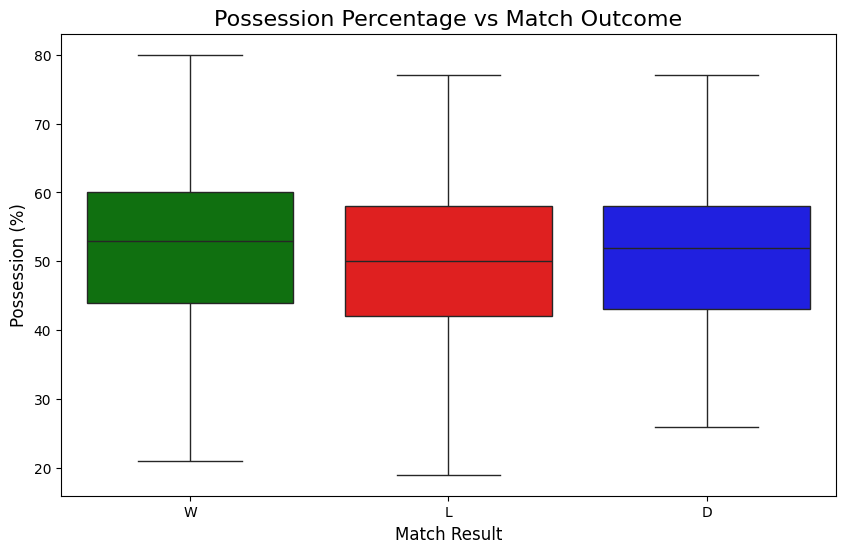

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='poss', data=df, palette={'W': 'green', 'L': 'red', 'D': 'blue'})
plt.title('Possession Percentage vs Match Outcome', fontsize=16)
plt.xlabel('Match Result', fontsize=12)
plt.ylabel('Possession (%)', fontsize=12)
plt.show()

#### 4.2.1 As we see the possession doesnt mean that teams tend to win but lets perform little statistical test (ANOVA one-way) to see if we're right

In [8]:
# Extracting possession percentages for each match outcome
poss_win = df[df['result'] == 'W']['poss']
poss_loss = df[df['result'] == 'L']['poss']
poss_draw = df[df['result'] == 'D']['poss']

# Performing a one-way ANOVA test to compare means across the three groups (win, lose, draw)
anova_result = stats.f_oneway(poss_win, poss_loss, poss_draw)

anova_result.pvalue

#####  Based on the p-value (0.0223), which is less than 0.05 we can accept that to some degree possesion influences the results

0.02238525177726725

## 5. Other insights


### 5.1 Possession vs. Match Outcome
We examine the role of possession in influencing match outcomes.

C:\Users\czarn\AppData\Local\Temp\ipykernel_11652\1031602743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='result', y='poss_last_4_games', data=df, palette='Set2')


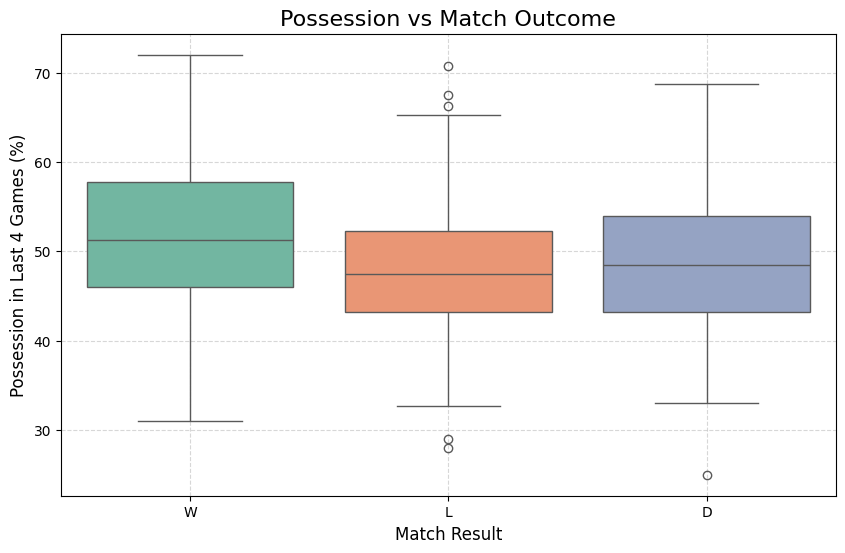

In [9]:
# Plotting possession vs match outcomes
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='poss_last_4_games', data=df, palette='Set2')
plt.title('Possession vs Match Outcome', fontsize=16)
plt.xlabel('Match Result', fontsize=12)
plt.ylabel('Possession in Last 4 Games (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 5.1 Shoot conversion rates
We examine the role of possession in influencing match outcomes.

In [11]:
# Replace 'inf' (infinity) values with NaN to avoid issues with teams that had zero shots
df['conversion_rate'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Recalculate the average conversion rate by team after handling 'inf' values
team_conversion_rate_cleaned = df.groupby('team')['conversion_rate'].mean().reset_index()

# Sort the teams by their average conversion rate in descending order
team_conversion_rate_cleaned = team_conversion_rate_cleaned.sort_values(by='conversion_rate', ascending=False)

# Display the top 10 teams with the highest conversion rate after cleaning
top_10_conversion_rate_cleaned = team_conversion_rate_cleaned.head(10)

top_10_conversion_rate_cleaned




C:\Users\czarn\AppData\Local\Temp\ipykernel_11652\3683275400.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['conversion_rate'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


,team,conversion_rate
1,Borussia Dortmund,19.247184
7,FC Bayern München,16.914935
0,Bayer 04 Leverkusen,15.959684
14,RB Leipzig,15.208559
15,SC Freiburg,14.467865
9,FC Union Berlin,14.154393
5,Eintracht Frankfurt,14.057601
19,TSG Hoffenheim,13.649072
22,VfL Wolfsburg,13.406165
2,Borussia Mönchengladbach,13.289535


#### Lets compare it to the table

In [15]:
# Let's calculate the points based on match results (Win = 3, Draw = 1, Loss = 0)

# First, we will map the 'result' column to points
points_mapping = {'W': 3, 'D': 1, 'L': 0}
df['calculated_points'] = df['result'].map(points_mapping)

# Now, calculate the total points for each team
team_total_points = df.groupby('team')['calculated_points'].sum().reset_index()

# Sort the teams by total points in descending order
team_total_points = team_total_points.sort_values(by='calculated_points', ascending=False)

# Get the top 10 teams by total points
top_10_teams_points = team_total_points.head(10)

top_10_teams_points


,team,calculated_points
7,FC Bayern München,168
1,Borussia Dortmund,157
14,RB Leipzig,154
0,Bayer 04 Leverkusen,136
9,FC Union Berlin,135
5,Eintracht Frankfurt,123
15,SC Freiburg,118
2,Borussia Mönchengladbach,110
20,VfB Stuttgart,110
22,VfL Wolfsburg,105


In [16]:
merged_top_teams = pd.merge(team_conversion_rate_cleaned, team_total_points, on='team', how='inner')
merged_top_teams

,team,conversion_rate,calculated_points
0,Borussia Dortmund,19.247184,157
1,FC Bayern München,16.914935,168
2,Bayer 04 Leverkusen,15.959684,136
3,RB Leipzig,15.208559,154
4,SC Freiburg,14.467865,118
5,FC Union Berlin,14.154393,135
6,Eintracht Frankfurt,14.057601,123
7,TSG Hoffenheim,13.649072,104
8,VfL Wolfsburg,13.406165,105
9,Borussia Mönchengladbach,13.289535,110


### 5.2 
We examine the role of possession in influencing match outcomes.

In [22]:
# Calculate the number of matches played by each team
team_match_count = df.groupby('team').size().reset_index(name='matches_played')

# Aggregate defensive stats (goals against, expected goals against, opponent shots, opponent shots on target)
# for each team, summing these stats over all matches played
team_defensive_stats = df.groupby('team')[['ga', 'xga', 'opponent_sh', 'opponent_sot']].sum().reset_index()

# Filter teams that have played at least 30 matches
teams_with_at_least_30_matches = team_match_count[team_match_count['matches_played'] >= 30]['team']

# Filter defensive stats to include only the teams that played at least 30 matches
filtered_team_defensive_stats = team_defensive_stats[team_defensive_stats['team'].isin(teams_with_at_least_30_matches)]

# Merge the filtered defensive stats with the match count for each team
team_defensive_stats_with_matches = pd.merge(filtered_team_defensive_stats, team_match_count, on='team', how='inner')

# Calculate the average goals conceded per game for each team
team_defensive_stats_with_matches['avg_ga_per_game'] = team_defensive_stats_with_matches['ga'] / team_defensive_stats_with_matches['matches_played']

# Calculate the average expected goals against per game for each team
team_defensive_stats_with_matches['avg_xga_per_game'] = team_defensive_stats_with_matches['xga'] / team_defensive_stats_with_matches['matches_played']

# Calculate the average opponent shots per game for each team
team_defensive_stats_with_matches['avg_opponent_sh_per_game'] = team_defensive_stats_with_matches['opponent_sh'] / team_defensive_stats_with_matches['matches_played']

# Calculate the average opponent shots on target per game for each team
team_defensive_stats_with_matches['avg_opponent_sot_per_game'] = team_defensive_stats_with_matches['opponent_sot'] / team_defensive_stats_with_matches['matches_played']

# Sort the teams by the average goals conceded per game in ascending order to identify the best defensive teams
team_defensive_stats_with_matches = team_defensive_stats_with_matches.sort_values(by='avg_ga_per_game', ascending=True)

# Display the resulting DataFrame with the defensive stats
team_defensive_stats_with_matches


,team,ga,xga,opponent_sh,opponent_sot,matches_played,avg_ga_per_game,avg_xga_per_game,avg_opponent_sh_per_game,avg_opponent_sot_per_game
11,RB Leipzig,60,68.2,602,182,70,0.857143,0.974286,8.600000,2.600000
6,FC Bayern München,65,65.5,582,194,69,0.942029,0.949275,8.434783,2.811594
8,FC Union Berlin,77,80.6,789,247,70,1.100000,1.151429,11.271429,3.528571
4,Eintracht Frankfurt,82,83.0,755,252,70,1.171429,1.185714,10.785714,3.600000
9,FSV Mainz 05,83,82.7,760,243,70,1.185714,1.181429,10.857143,3.471429
0,Bayer 04 Leverkusen,85,77.3,687,252,70,1.214286,1.104286,9.814286,3.600000
1,Borussia Dortmund,89,86.1,721,260,70,1.271429,1.230000,10.300000,3.714286
17,VfL Wolfsburg,92,93.2,797,265,70,1.314286,1.331429,11.385714,3.785714
12,SC Freiburg,93,91.4,887,284,70,1.328571,1.305714,12.671429,4.057143
3,DSC Arminia Bielefeld,46,56.8,435,149,34,1.352941,1.670588,12.794118,4.382353
